In [1]:
import pandas as pd
from utils_error_analysis import *

In [2]:
#!pip install statsmodels

FPP, PPV and Confusion matrices

# In-Domain

## MAMI

### Binary

In [3]:
#test labels
mami_test_df = pd.read_json("../data/MAMI/MAMI_test.json",orient='index')
y_test = mami_test_df['misogynous'].to_numpy()

In [4]:
#individual predictions
bin_label = "misogynous_prediction"
#model predictions
y_style_emo = pd.read_csv("../models/output/MAMI/svm_stylometric_emotion_MAMI_test_binary.csv")[bin_label].to_numpy()
y_roberta = pd.read_csv("../models/output/MAMI/roberta_MAMI_test_binary.csv")[bin_label].to_numpy()
y_multimodal = pd.read_csv("../models/output/MAMI/multimodal_roberta_swin_MAMI_test_binary.csv")[bin_label].to_numpy()
y_ensemble = pd.read_csv("../models/output/MAMI/ensemble_svm_roberta_robertaswin_MAMI_test_binary.csv")[bin_label].to_numpy()

In [5]:
model_names = ["SVM stle emo","RoBERTa","RoBERTa+Swin V2","Ensemble"]
predictions = [y_style_emo,y_roberta,y_multimodal,y_ensemble]

for model, prediction_list in zip (model_names,predictions):
    get_fpr_ppv(y_test,prediction_list,model,[])
    print("-"*30)

SVM stle emo - in-domain
FPR: 0.53
PPV: 0.62
------------------------------
RoBERTa - in-domain
FPR: 0.45
PPV: 0.66
------------------------------
RoBERTa+Swin V2 - in-domain
FPR: 0.57
PPV: 0.62
------------------------------
Ensemble - in-domain
FPR: 0.52
PPV: 0.64
------------------------------


### Multi-label

In [6]:
mami_label_names = ["misogynous","shaming","stereotype","objectification","violence"]
mami_test_df = pd.read_json("../data/MAMI/MAMI_test.json",orient='index')
y_test = mami_test_df[mami_label_names].to_numpy()

In [7]:
#model predictions
pred_labels = [f"{label}_prediction" for label in mami_label_names]
y_style_emo = pd.read_csv("../models/output/MAMI/roberta_first_step/svm_stylometric_emotion_w_roberta_MAMI_test_hierarchical.csv")[pred_labels].to_numpy()
y_roberta = pd.read_csv("../models/output/MAMI/roberta_first_step/roberta_MAMI_test_hierarchical.csv")[pred_labels].to_numpy()
y_multimodal = pd.read_csv("../models/output/MAMI/roberta_first_step/multimodal_roberta_swin_MAMI_test_hierarchical.csv")[pred_labels].to_numpy()
y_ensemble = pd.read_csv("../models/output/MAMI/roberta_first_step/ensemble_svm_roberta_robertaswin_hier_ens_MAMI_test_hierarchical.csv")[pred_labels].to_numpy()

SVM Style-Emo - in-domain
Class misogynous          | FPR: 0.45  | PPV: 0.66
Class shaming             | FPR: 0.14  | PPV: 0.30
Class stereotype          | FPR: 0.28  | PPV: 0.51
Class objectification     | FPR: 0.19  | PPV: 0.60
Class violence            | FPR: 0.04  | PPV: 0.66
Average FPR: 0.22
Average PPV: 0.55
------------------------------


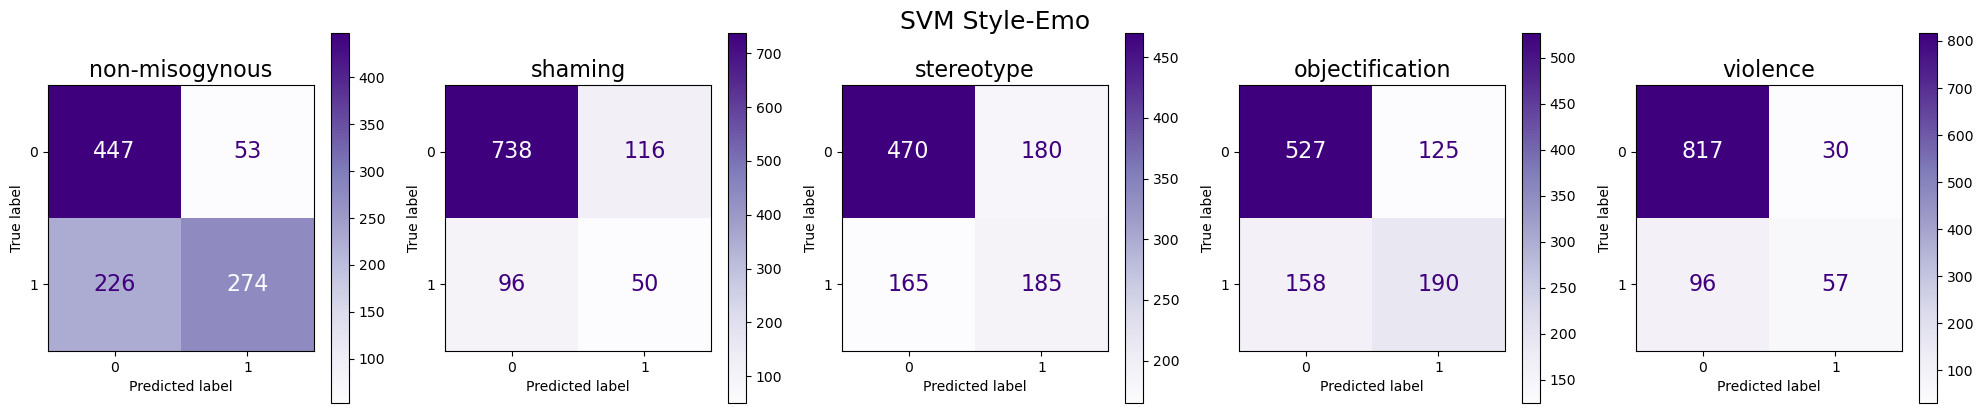

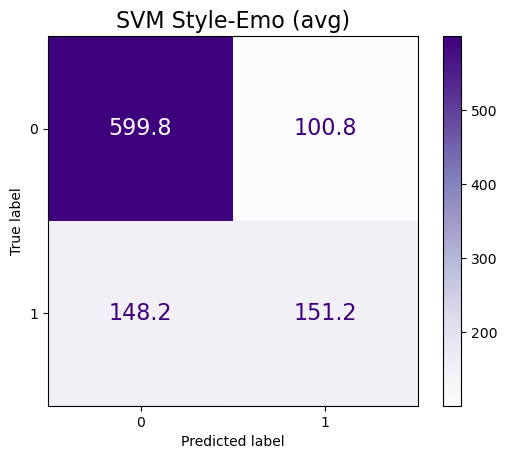

------------------------------
RoBERTa - in-domain
Class misogynous          | FPR: 0.45  | PPV: 0.66
Class shaming             | FPR: 0.14  | PPV: 0.36
Class stereotype          | FPR: 0.19  | PPV: 0.54
Class objectification     | FPR: 0.20  | PPV: 0.61
Class violence            | FPR: 0.03  | PPV: 0.72
Average FPR: 0.20
Average PPV: 0.58
------------------------------


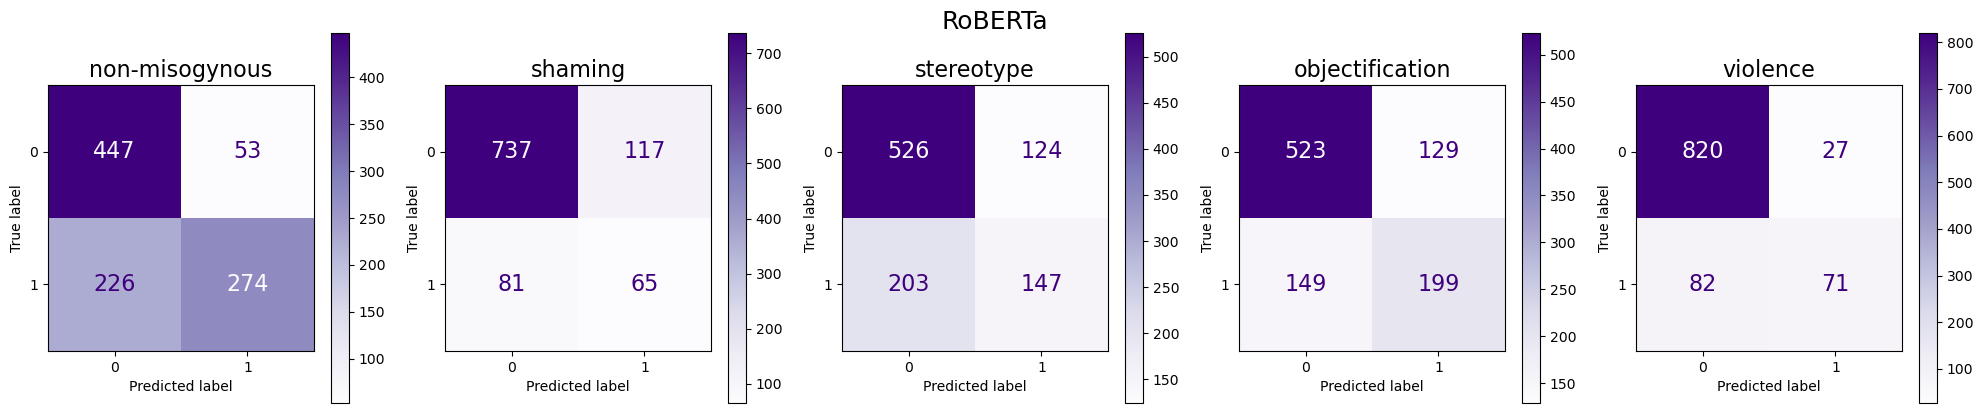

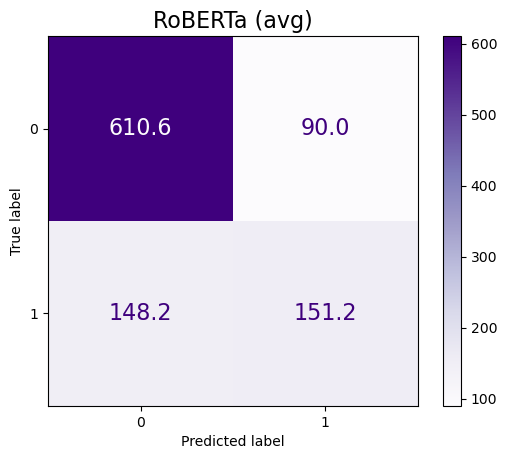

------------------------------
RoBERTa+Swin V2 - in-domain
Class misogynous          | FPR: 0.45  | PPV: 0.66
Class shaming             | FPR: 0.13  | PPV: 0.34
Class stereotype          | FPR: 0.26  | PPV: 0.50
Class objectification     | FPR: 0.14  | PPV: 0.69
Class violence            | FPR: 0.06  | PPV: 0.64
Average FPR: 0.21
Average PPV: 0.57
------------------------------


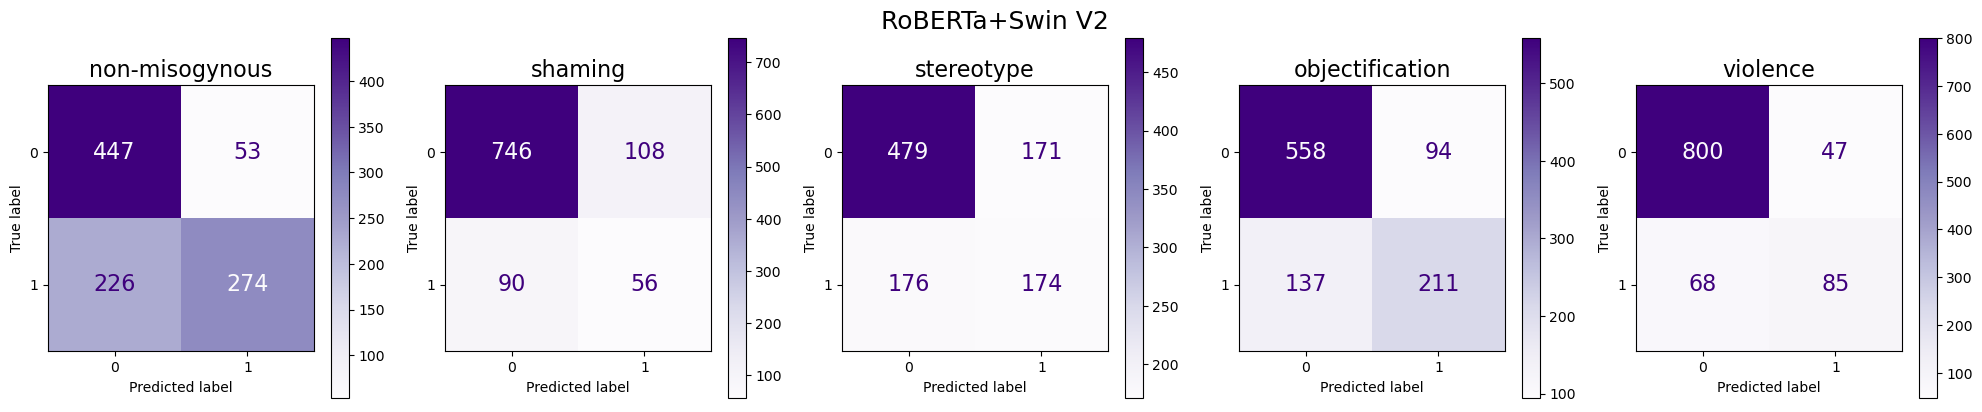

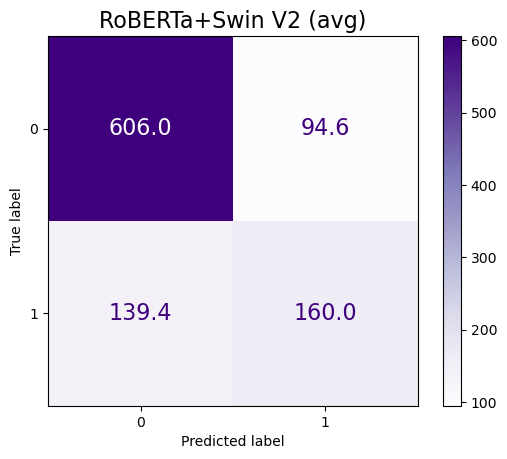

------------------------------
Ensemble - in-domain
Class misogynous          | FPR: 0.45  | PPV: 0.66
Class shaming             | FPR: 0.11  | PPV: 0.37
Class stereotype          | FPR: 0.23  | PPV: 0.52
Class objectification     | FPR: 0.16  | PPV: 0.67
Class violence            | FPR: 0.03  | PPV: 0.76
Average FPR: 0.20
Average PPV: 0.60
------------------------------


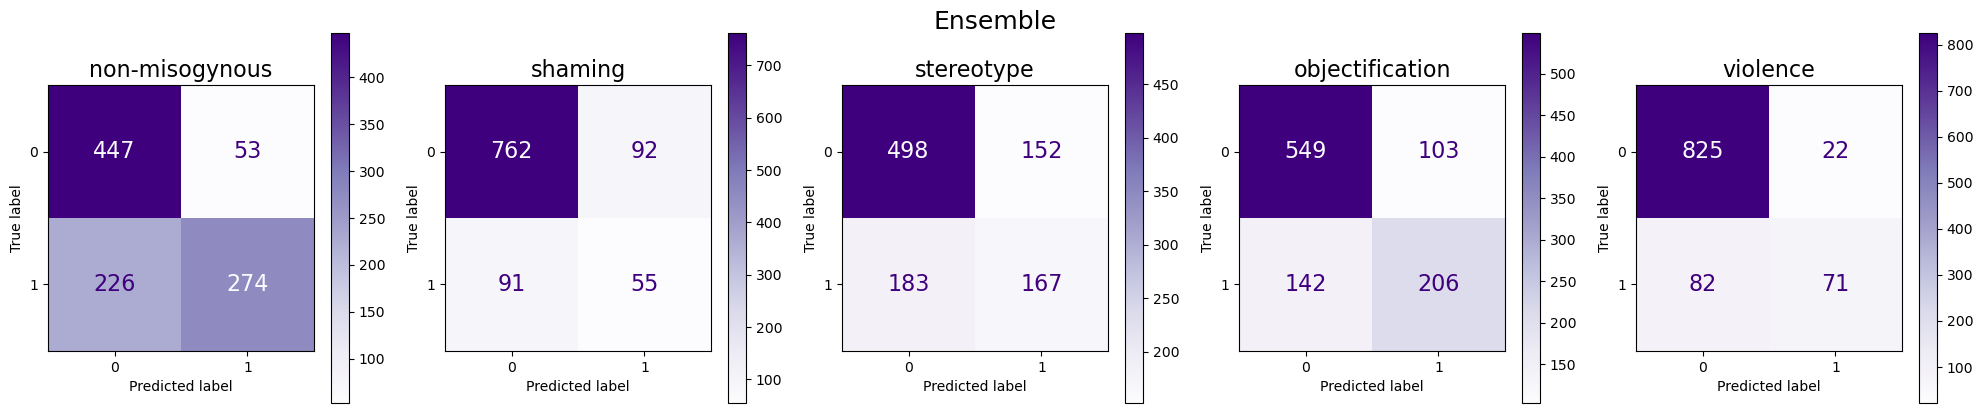

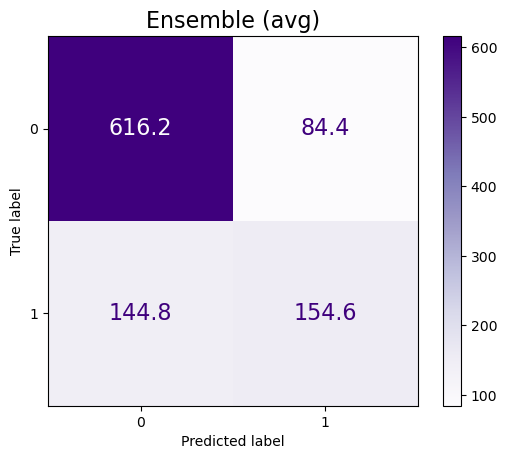

------------------------------


In [8]:
model_names = ["SVM Style-Emo","RoBERTa","RoBERTa+Swin V2","Ensemble"]
predictions = [y_style_emo,y_roberta,y_multimodal,y_ensemble]

for model, prediction_list in zip (model_names,predictions):
    get_fpr_ppv(y_test,prediction_list,model,mami_label_names)
    print("-"*30)
    get_avg_confusion_matrices(y_test, prediction_list,mami_label_names,model)
    print("-"*30)

## EXIST 2024

### Binary

In [9]:
#test labels
exist_test_df = pd.read_json("../data/EXIST2024/EXIST2024_test.json",orient='index')
y_test = exist_test_df['sexist'].to_numpy()

In [10]:
bin_label = "sexist_prediction"
#model predictions
y_style_emo = pd.read_csv("../models/output/EXIST2024/svm_stylometric_emotion_EXIST2024_test_binary.csv")[bin_label].to_numpy()
y_roberta = pd.read_csv("../models/output/EXIST2024/roberta_EXIST2024_test_binary.csv")[bin_label].to_numpy()
y_multimodal = pd.read_csv("../models/output/EXIST2024/multimodal_roberta_swin_EXIST2024_test_binary.csv")[bin_label].to_numpy()
y_ensemble = pd.read_csv("../models/output/EXIST2024/ensemble_svm_roberta_robertaswin_EXIST2024_test_binary.csv")[bin_label].to_numpy()

In [11]:
model_names = ["SVM style emo","RoBERTa","RoBERTa+Swin V2","Ensemble"]
predictions = [y_style_emo,y_roberta,y_multimodal,y_ensemble]

for model, prediction_list in zip (model_names,predictions):
    get_fpr_ppv(y_test,prediction_list,model,[])
    print("-"*30)

SVM style emo - in-domain
FPR: 0.47
PPV: 0.67
------------------------------
RoBERTa - in-domain
FPR: 0.36
PPV: 0.73
------------------------------
RoBERTa+Swin V2 - in-domain
FPR: 0.30
PPV: 0.76
------------------------------
Ensemble - in-domain
FPR: 0.32
PPV: 0.76
------------------------------


## Multi-label

In [12]:
#test labels
exist_label_names = ["sexist","ideological-inequality","stereotyping-dominance","objectification", "sexual-violence", "misogyny-non-sexual-violence"]
exist_test_df = pd.read_json("../data/EXIST2024/EXIST2024_test.json",orient='index')
y_test = exist_test_df[exist_label_names].to_numpy()

In [13]:
#model predictions
pred_labels = [f"{label}_prediction" for label in exist_label_names]
y_style_emo = pd.read_csv("../models/output/EXIST2024/ensemble_first_step/svm_stylometric_emotion_w_ensemble_EXIST2024_test_hierarchical.csv")[pred_labels].to_numpy()
y_roberta = pd.read_csv("../models/output/EXIST2024/ensemble_first_step/roberta_EXIST2024_test_hierarchical.csv")[pred_labels].to_numpy()
y_multimodal = pd.read_csv("../models/output/EXIST2024/ensemble_first_step/multimodal_roberta_swin_EXIST2024_test_hierarchical.csv")[pred_labels].to_numpy()
y_ensemble = pd.read_csv("../models/output/EXIST2024/ensemble_first_step/ensemble_svm_roberta_robertaswin_hier_ens_EXIST2024_test_hierarchical.csv")[pred_labels].to_numpy()


SVM Style-Emo - in-domain
Class sexist              | FPR: 0.32  | PPV: 0.76
Class ideological-inequality| FPR: 0.12  | PPV: 0.60
Class stereotyping-dominance| FPR: 0.24  | PPV: 0.33
Class objectification     | FPR: 0.20  | PPV: 0.51
Class sexual-violence     | FPR: 0.07  | PPV: 0.21
Class misogyny-non-sexual-violence| FPR: 0.04  | PPV: 0.40
Average FPR: 0.16
Average PPV: 0.47
------------------------------


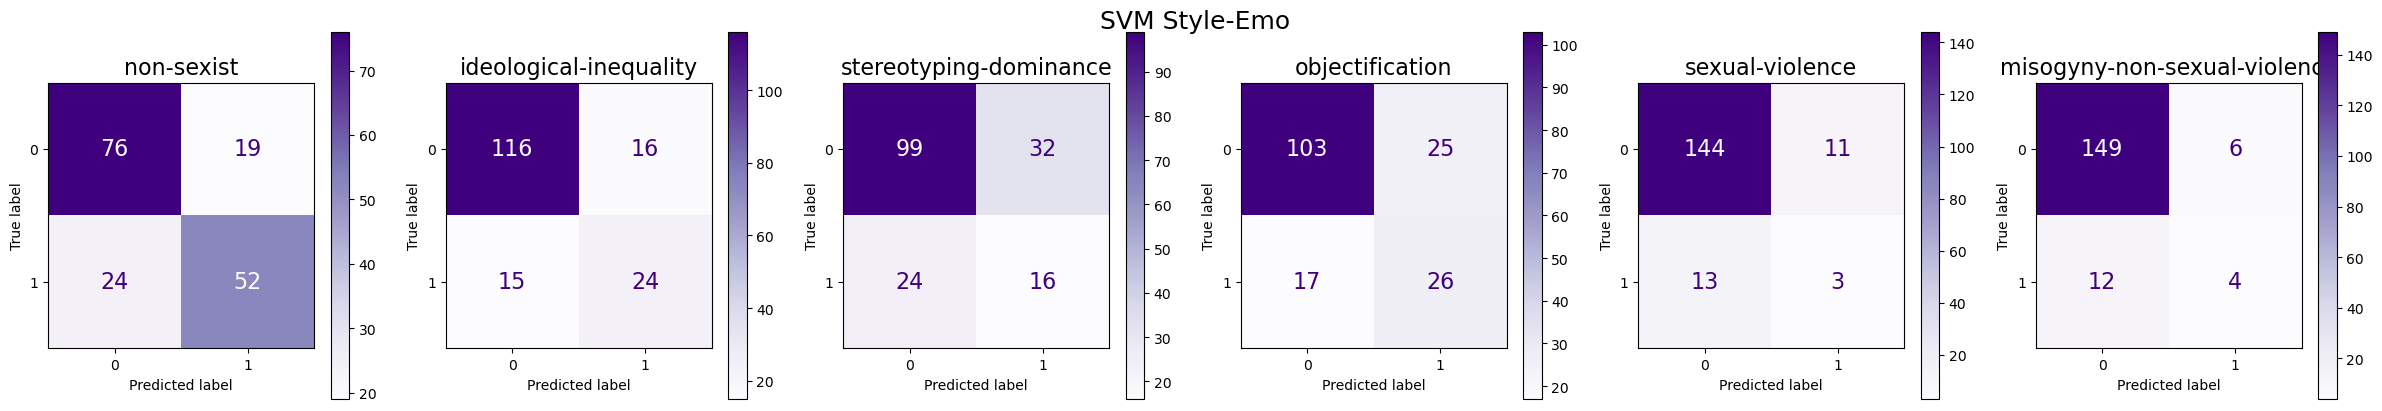

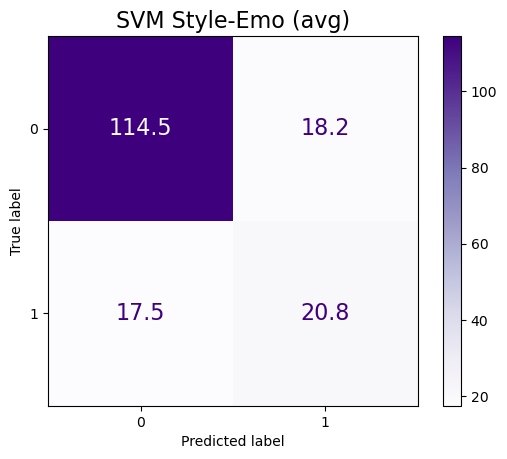

------------------------------
RoBERTa - in-domain
Class sexist              | FPR: 0.32  | PPV: 0.76
Class ideological-inequality| FPR: 0.14  | PPV: 0.56
Class stereotyping-dominance| FPR: 0.22  | PPV: 0.43
Class objectification     | FPR: 0.16  | PPV: 0.59
Class sexual-violence     | FPR: 0.08  | PPV: 0.32
Class misogyny-non-sexual-violence| FPR: 0.09  | PPV: 0.22
Average FPR: 0.17
Average PPV: 0.48
------------------------------


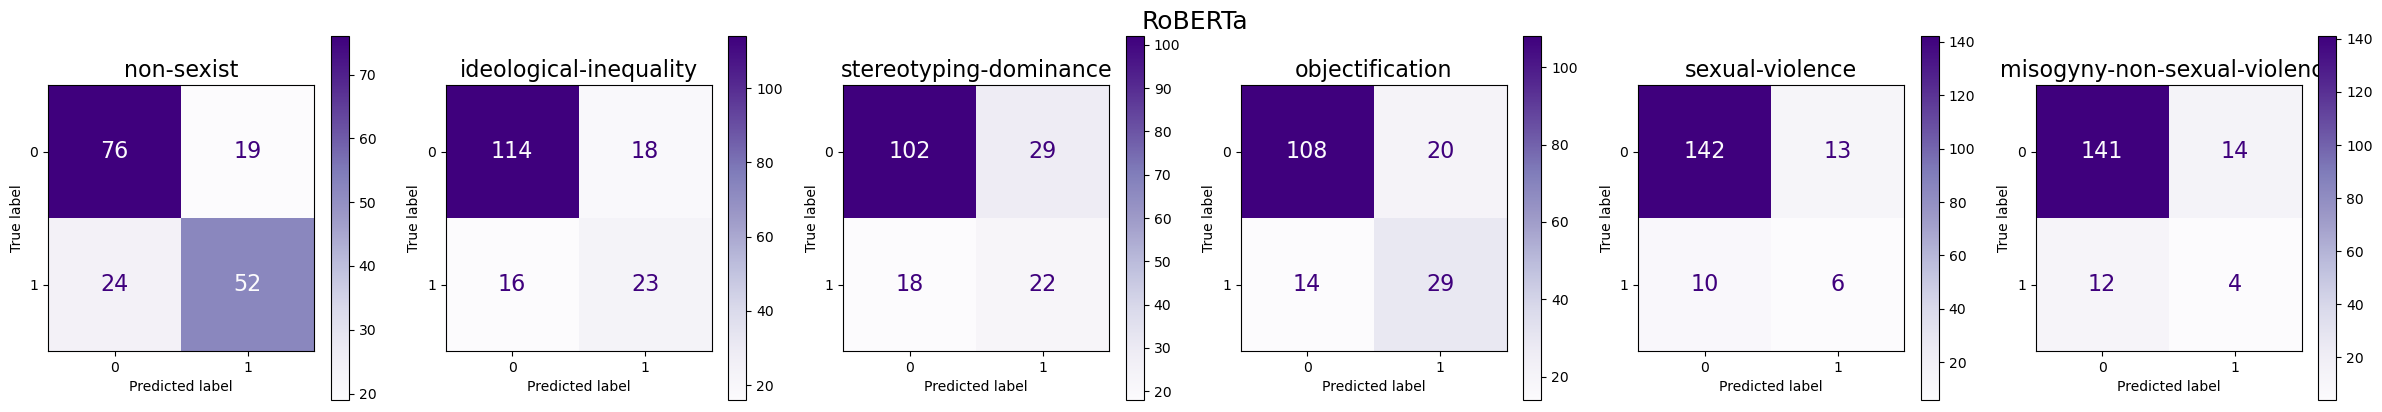

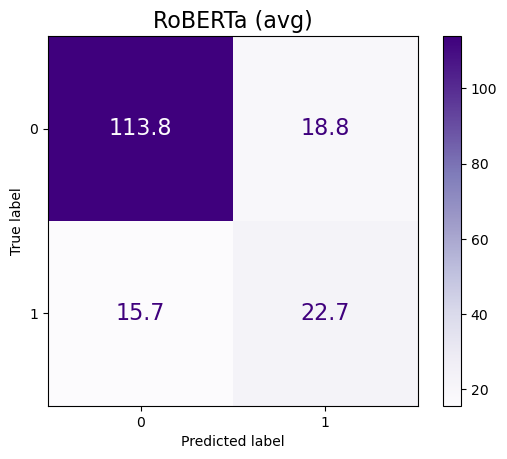

------------------------------
RoBERTa+Swin V2 - in-domain
Class sexist              | FPR: 0.32  | PPV: 0.76
Class ideological-inequality| FPR: 0.12  | PPV: 0.59
Class stereotyping-dominance| FPR: 0.31  | PPV: 0.39
Class objectification     | FPR: 0.15  | PPV: 0.56
Class sexual-violence     | FPR: 0.06  | PPV: 0.38
Class misogyny-non-sexual-violence| FPR: 0.05  | PPV: 0.22
Average FPR: 0.17
Average PPV: 0.48
------------------------------


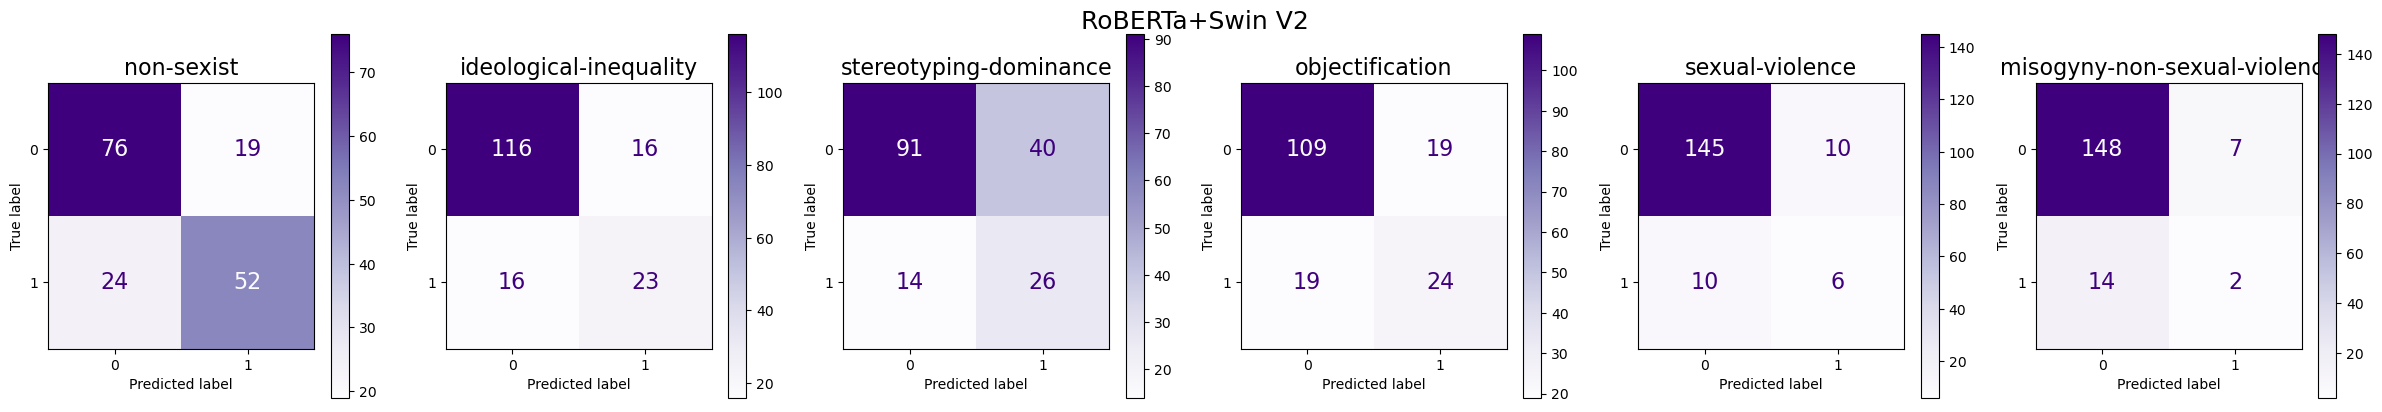

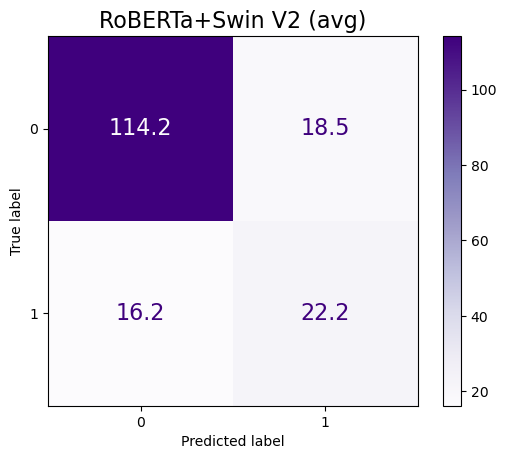

------------------------------
Ensemble - in-domain
Class sexist              | FPR: 0.32  | PPV: 0.76
Class ideological-inequality| FPR: 0.13  | PPV: 0.57
Class stereotyping-dominance| FPR: 0.26  | PPV: 0.40
Class objectification     | FPR: 0.15  | PPV: 0.60
Class sexual-violence     | FPR: 0.06  | PPV: 0.38
Class misogyny-non-sexual-violence| FPR: 0.04  | PPV: 0.25
Average FPR: 0.16
Average PPV: 0.49
------------------------------


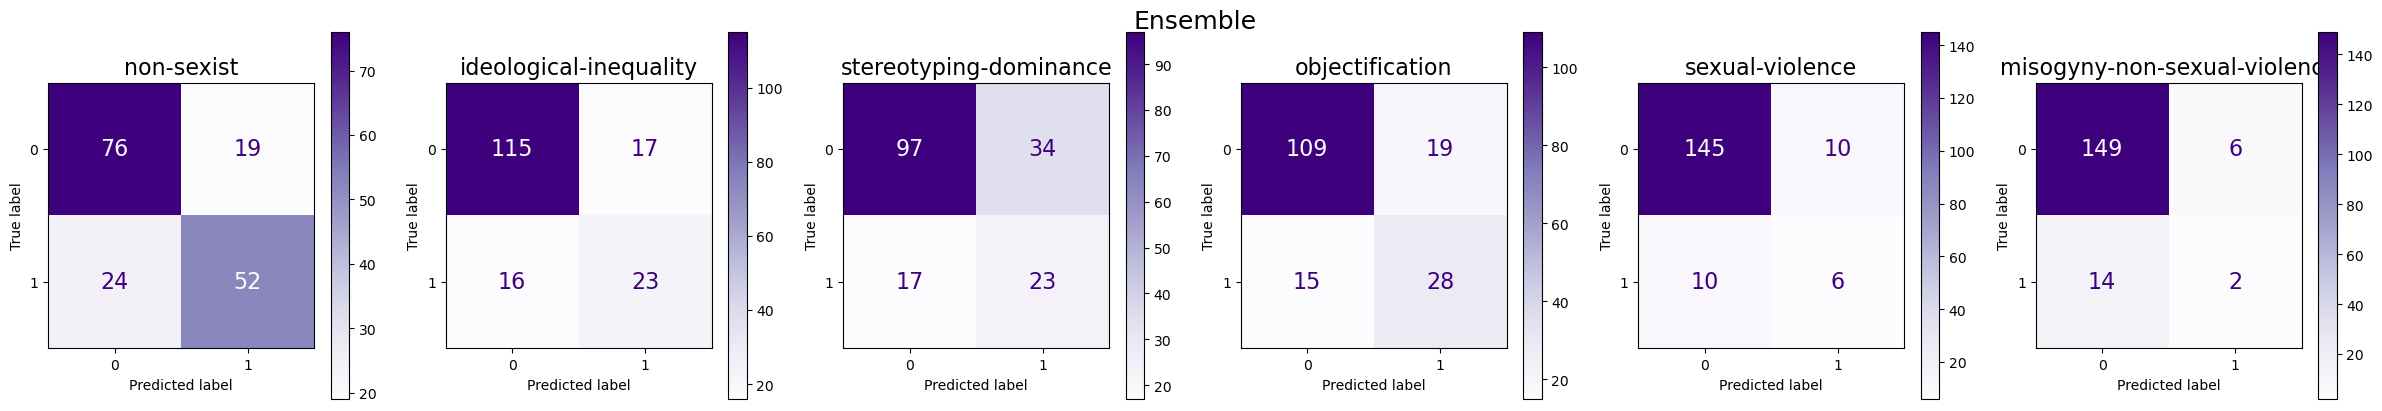

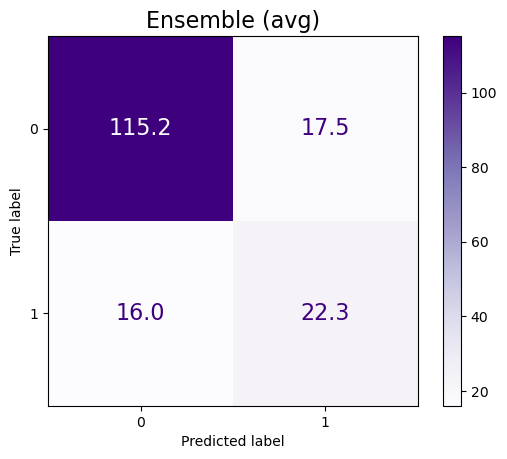

------------------------------


In [14]:
model_names = ["SVM Style-Emo","RoBERTa","RoBERTa+Swin V2","Ensemble"]
predictions = [y_style_emo,y_roberta,y_multimodal,y_ensemble]

for model, prediction_list in zip (model_names,predictions):
    get_fpr_ppv(y_test,prediction_list,model,exist_label_names)
    print("-"*30)
    get_avg_confusion_matrices(y_test, prediction_list,exist_label_names,model)
    print("-"*30)

# Cross-Dataset

## MAMI

### Binary

In [15]:
#test labels
mami_test_df = pd.read_json("../data/overlapping_classes/MAMI/MAMI_test.json",orient='index')
y_test = mami_test_df['misogynous'].to_numpy()

In [16]:
bin_label = "misogynous_prediction"
#model predictions
y_style_emo = pd.read_csv("../models/output/cross_dataset/MAMI/svm_stylometric_emotion_MAMI_test_binary.csv")[bin_label].to_numpy()
y_roberta = pd.read_csv("../models/output/cross_dataset/MAMI/roberta_MAMI_test_binary.csv")[bin_label].to_numpy()
y_multimodal = pd.read_csv("../models/output/cross_dataset/MAMI/multimodal_roberta_swin_MAMI_test_binary.csv")[bin_label].to_numpy()
y_ensemble = pd.read_csv("../models/output/cross_dataset/MAMI/ensemble_svm_roberta_robertaswin_MAMI_test_binary.csv")[bin_label].to_numpy()

In [17]:
model_names = ["SVM stle emo","RoBERTa","RoBERTa+Swin V2","Ensemble"]
predictions = [y_style_emo,y_roberta,y_multimodal,y_ensemble]

for model, prediction_list in zip (model_names,predictions):
    get_fpr_ppv(y_test,prediction_list,model,[],setup="cross-dataset")
    print("-"*30)

SVM stle emo - cross-dataset
FPR: 0.48
PPV: 0.58
------------------------------
RoBERTa - cross-dataset
FPR: 0.33
PPV: 0.66
------------------------------
RoBERTa+Swin V2 - cross-dataset
FPR: 0.41
PPV: 0.64
------------------------------
Ensemble - cross-dataset
FPR: 0.39
PPV: 0.65
------------------------------


### Multi-label

In [18]:
#test labels
mami_label_names = ["misogynous","stereotype","objectification","violence"]
mami_test_df = pd.read_json("../data/overlapping_classes/MAMI/MAMI_test.json",orient='index')
y_test = mami_test_df[mami_label_names].to_numpy()

In [19]:
#model predictions
pred_labels = [f"{label}_prediction" for label in mami_label_names]
y_style_emo = pd.read_csv("../models/output/cross_dataset/MAMI/ensemble_first_step/svm_stylometric_emotion_w_ensemble_MAMI_test_hierarchical.csv")[pred_labels].to_numpy()
y_roberta = pd.read_csv("../models/output/cross_dataset/MAMI/ensemble_first_step/roberta_MAMI_test_hierarchical.csv")[pred_labels].to_numpy()
y_multimodal = pd.read_csv("../models/output/cross_dataset/MAMI/ensemble_first_step/multimodal_roberta_swin_MAMI_test_hierarchical.csv")[pred_labels].to_numpy()
y_ensemble = pd.read_csv("../models/output/cross_dataset/MAMI/ensemble_first_step/ensemble_svm_roberta_robertaswin_hier_ens_MAMI_test_hierarchical.csv")[pred_labels].to_numpy()

SVM Style-Emo - cross-dataset
Class misogynous          | FPR: 0.39  | PPV: 0.65
Class stereotype          | FPR: 0.25  | PPV: 0.53
Class objectification     | FPR: 0.29  | PPV: 0.52
Class violence            | FPR: 0.09  | PPV: 0.20
Average FPR: 0.25
Average PPV: 0.48
------------------------------


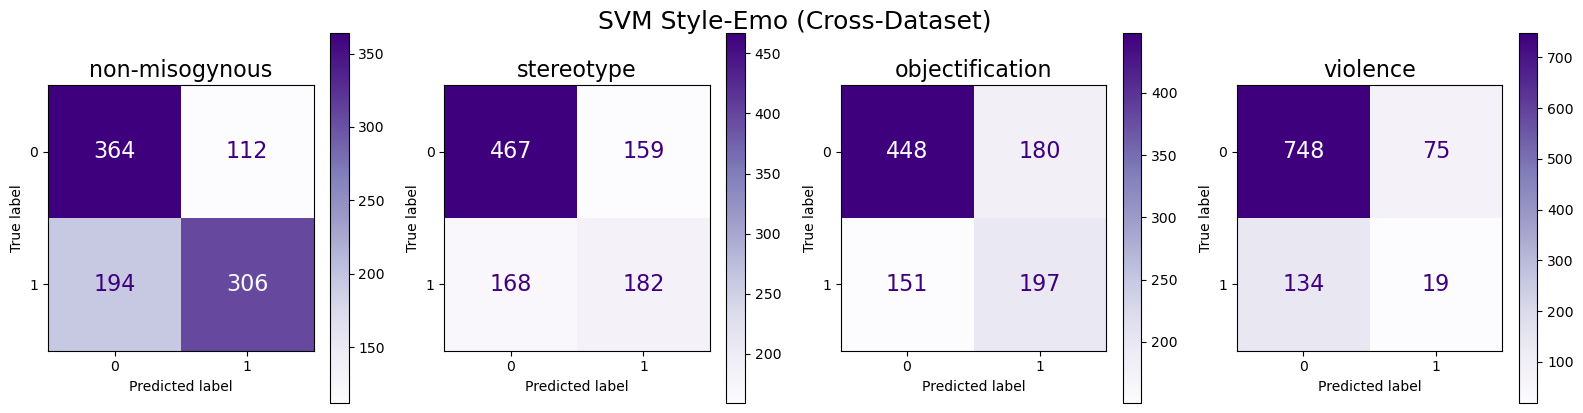

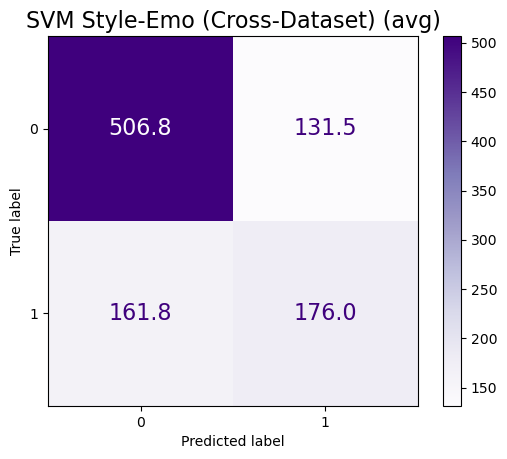

------------------------------
RoBERTa - cross-dataset
Class misogynous          | FPR: 0.39  | PPV: 0.65
Class stereotype          | FPR: 0.21  | PPV: 0.57
Class objectification     | FPR: 0.30  | PPV: 0.50
Class violence            | FPR: 0.08  | PPV: 0.25
Average FPR: 0.25
Average PPV: 0.50
------------------------------


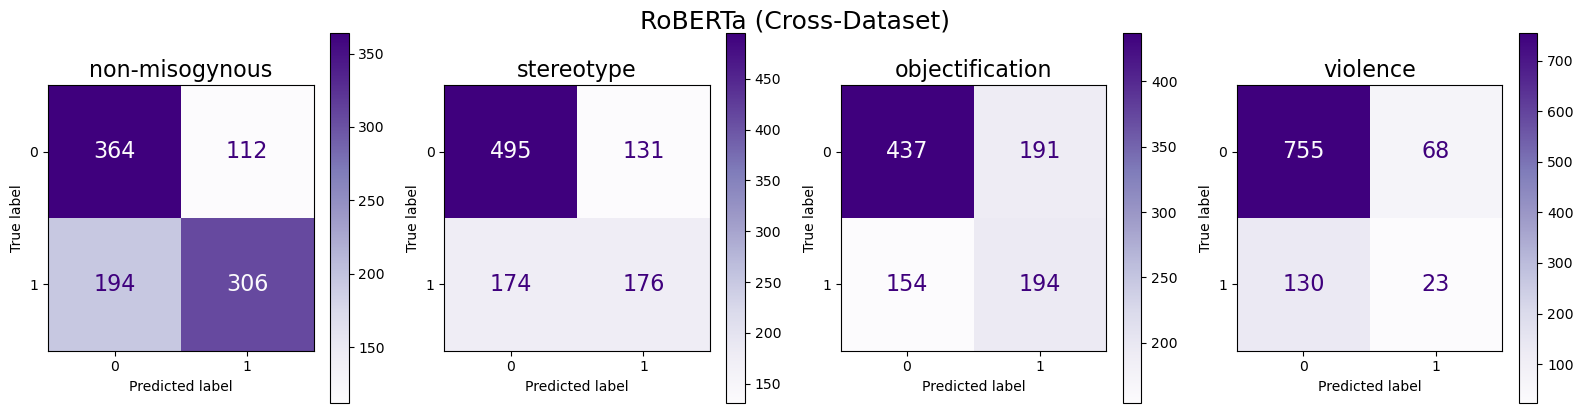

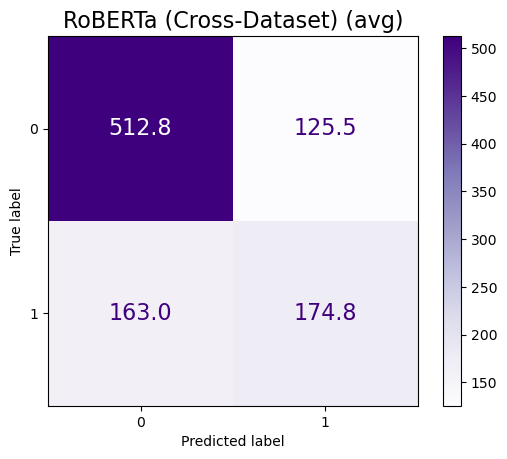

------------------------------
RoBERTa+Swin V2 - cross-dataset
Class misogynous          | FPR: 0.39  | PPV: 0.65
Class stereotype          | FPR: 0.30  | PPV: 0.52
Class objectification     | FPR: 0.23  | PPV: 0.56
Class violence            | FPR: 0.11  | PPV: 0.25
Average FPR: 0.26
Average PPV: 0.50
------------------------------


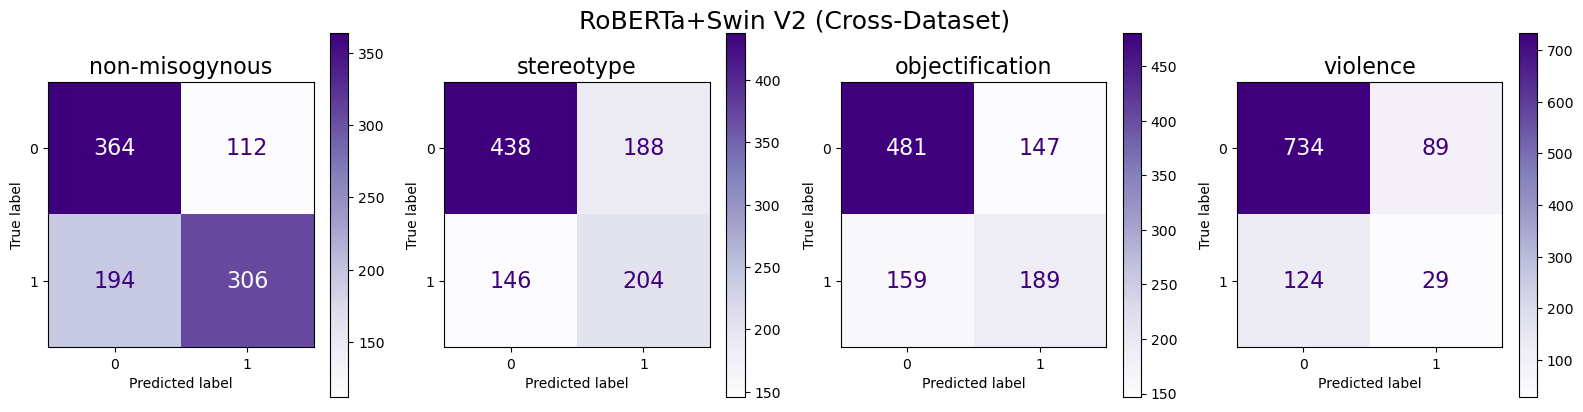

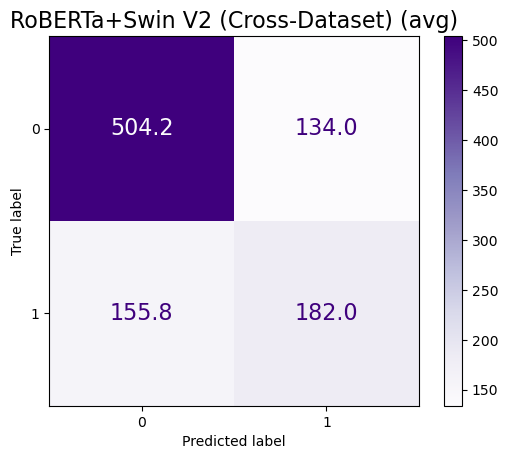

------------------------------
Ensemble - cross-dataset
Class misogynous          | FPR: 0.39  | PPV: 0.65
Class stereotype          | FPR: 0.26  | PPV: 0.55
Class objectification     | FPR: 0.27  | PPV: 0.54
Class violence            | FPR: 0.08  | PPV: 0.20
Average FPR: 0.25
Average PPV: 0.49
------------------------------


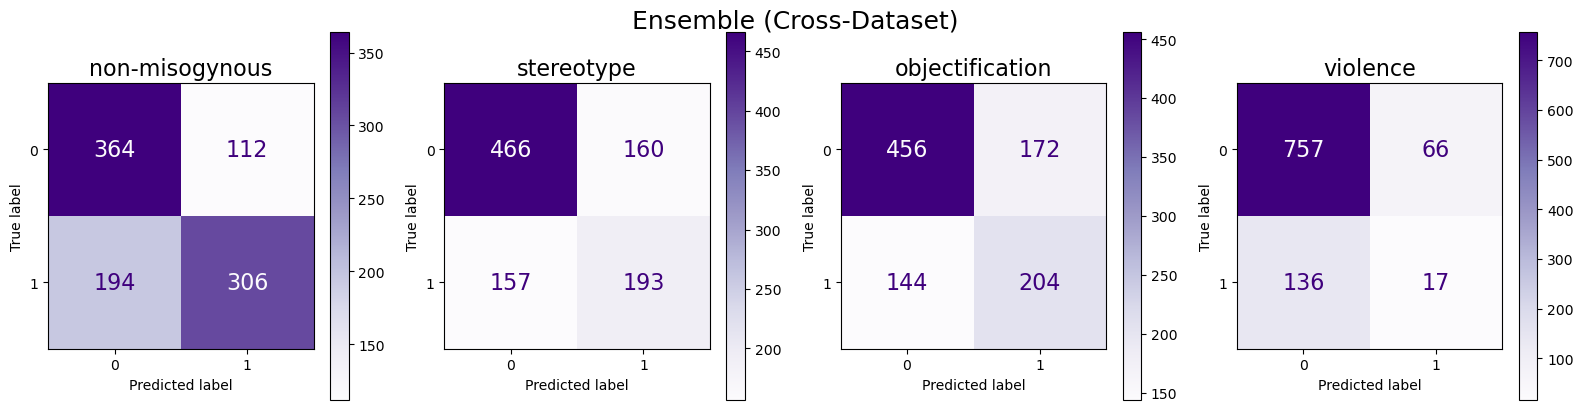

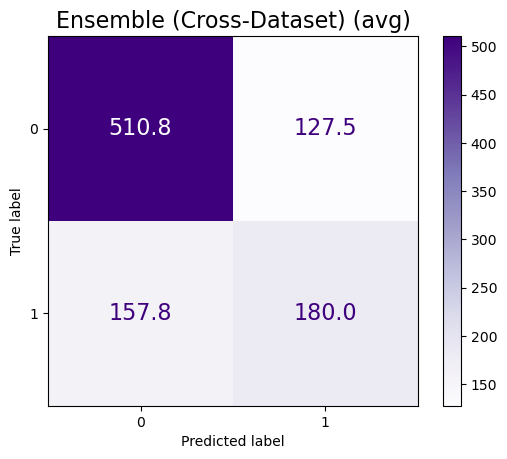

------------------------------


In [20]:
model_names = ["SVM Style-Emo","RoBERTa","RoBERTa+Swin V2","Ensemble"]
predictions = [y_style_emo,y_roberta,y_multimodal,y_ensemble]

for model, prediction_list in zip (model_names,predictions):
    get_fpr_ppv(y_test,prediction_list,model,mami_label_names,setup="cross-dataset")
    print("-"*30)
    get_avg_confusion_matrices(y_test, prediction_list,mami_label_names,model,setup="cross-dataset")
    print("-"*30)

## EXIST 2024

### Binary

In [21]:
#test labels
exist_test_df = pd.read_json("../data/overlapping_classes/EXIST2024/EXIST2024_test.json",orient='index')
y_test = exist_test_df['sexist'].to_numpy()

In [22]:
bin_label = "sexist_prediction"
#model predictions
y_style_emo = pd.read_csv("../models/output/cross_dataset/EXIST2024/svm_stylometric_emotion_EXIST2024_test_binary.csv")[bin_label].to_numpy()
y_roberta = pd.read_csv("../models/output/cross_dataset/EXIST2024/roberta_EXIST2024_test_binary.csv")[bin_label].to_numpy()
y_multimodal = pd.read_csv("../models/output/cross_dataset/EXIST2024/multimodal_roberta_swin_EXIST2024_test_binary.csv")[bin_label].to_numpy()
y_ensemble = pd.read_csv("../models/output/cross_dataset/EXIST2024/ensemble_svm_roberta_robertaswin_EXIST2024_test_binary.csv")[bin_label].to_numpy()

In [23]:
model_names = ["SVM stle emo","RoBERTa","RoBERTa+Swin V2","Ensemble"]
predictions = [y_style_emo,y_roberta,y_multimodal,y_ensemble]

for model, prediction_list in zip (model_names,predictions):
    get_fpr_ppv(y_test,prediction_list,model,[],setup="cross-dataset")
    print("-"*30)

SVM stle emo - cross-dataset
FPR: 0.33
PPV: 0.63
------------------------------
RoBERTa - cross-dataset
FPR: 0.41
PPV: 0.64
------------------------------
RoBERTa+Swin V2 - cross-dataset
FPR: 0.42
PPV: 0.63
------------------------------
Ensemble - cross-dataset
FPR: 0.39
PPV: 0.65
------------------------------


### Multi-label

In [24]:
#test labels
exist_label_names = ["sexist","stereotyping-dominance","objectification", "sexual-violence"]
exist_test_df = pd.read_json("../data/overlapping_classes/EXIST2024/EXIST2024_test.json",orient='index')
y_test = exist_test_df[exist_label_names].to_numpy()

In [25]:
#model predictions
pred_labels = [f"{label}_prediction" for label in exist_label_names]
y_style_emo = pd.read_csv("../models/output/cross_dataset/EXIST2024/ensemble_first_step/svm_stylometric_emotion_w_ensemble_EXIST2024_test_hierarchical.csv")[pred_labels].to_numpy()
y_roberta = pd.read_csv("../models/output/cross_dataset/EXIST2024/ensemble_first_step/roberta_EXIST2024_test_hierarchical.csv")[pred_labels].to_numpy()
y_multimodal = pd.read_csv("../models/output/cross_dataset/EXIST2024/ensemble_first_step/multimodal_roberta_swin_EXIST2024_test_hierarchical.csv")[pred_labels].to_numpy()
y_ensemble = pd.read_csv("../models/output/cross_dataset/EXIST2024/ensemble_first_step/ensemble_svm_roberta_robertaswin_hier_ens_EXIST2024_test_hierarchical.csv")[pred_labels].to_numpy()


SVM Style-Emo - cross-dataset
Class sexist              | FPR: 0.39  | PPV: 0.65
Class stereotyping-dominance| FPR: 0.40  | PPV: 0.33
Class objectification     | FPR: 0.23  | PPV: 0.50
Class sexual-violence     | FPR: 0.09  | PPV: 0.25
Average FPR: 0.28
Average PPV: 0.43
------------------------------


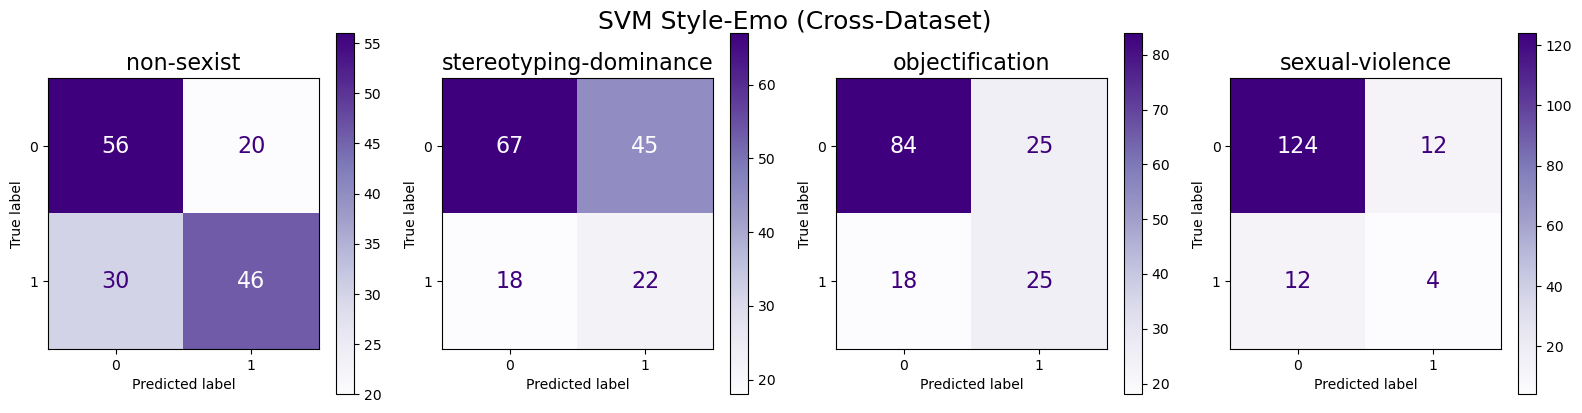

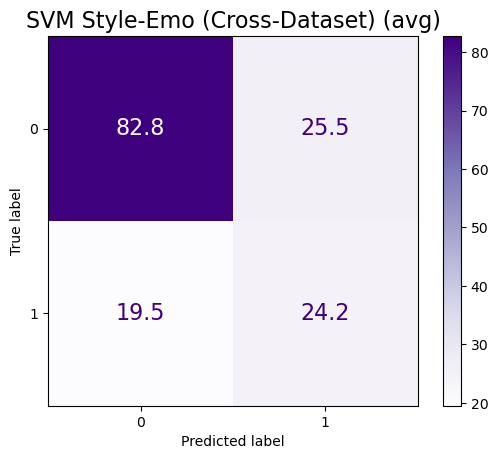

------------------------------
RoBERTa - cross-dataset
Class sexist              | FPR: 0.39  | PPV: 0.65
Class stereotyping-dominance| FPR: 0.45  | PPV: 0.35
Class objectification     | FPR: 0.22  | PPV: 0.52
Class sexual-violence     | FPR: 0.12  | PPV: 0.19
Average FPR: 0.30
Average PPV: 0.43
------------------------------


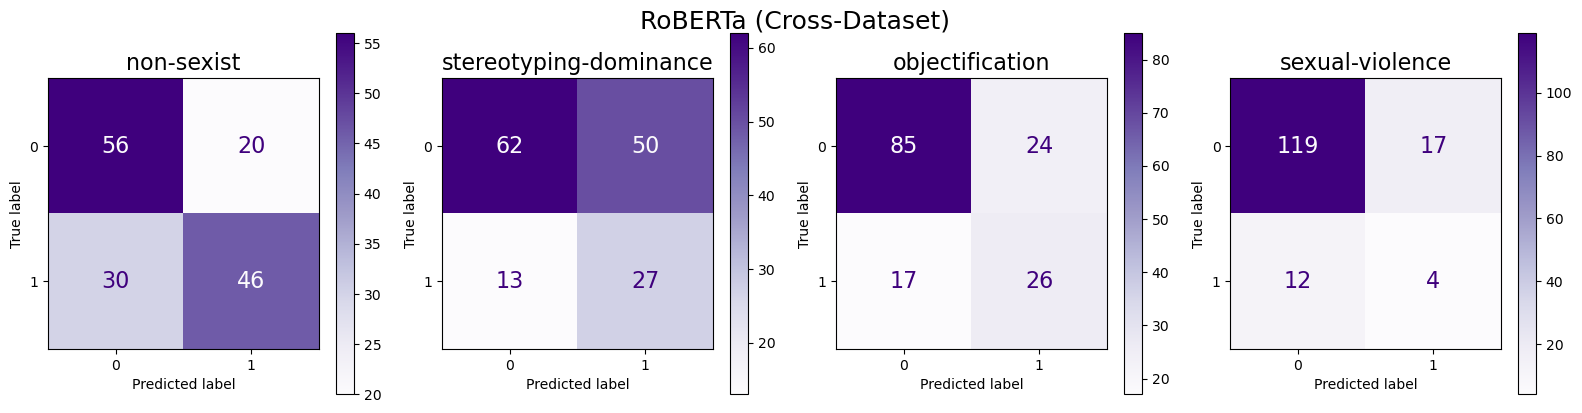

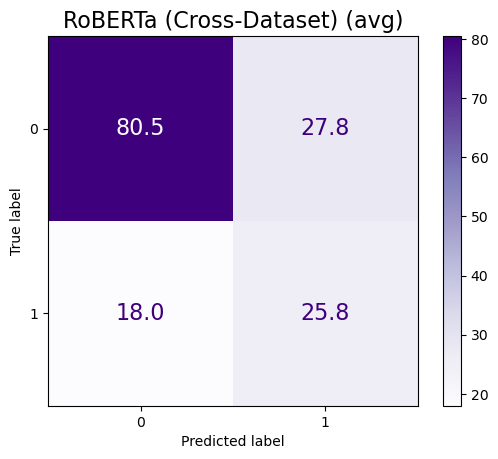

------------------------------
RoBERTa+Swin V2 - cross-dataset
Class sexist              | FPR: 0.39  | PPV: 0.65
Class stereotyping-dominance| FPR: 0.47  | PPV: 0.33
Class objectification     | FPR: 0.18  | PPV: 0.50
Class sexual-violence     | FPR: 0.09  | PPV: 0.14
Average FPR: 0.28
Average PPV: 0.41
------------------------------


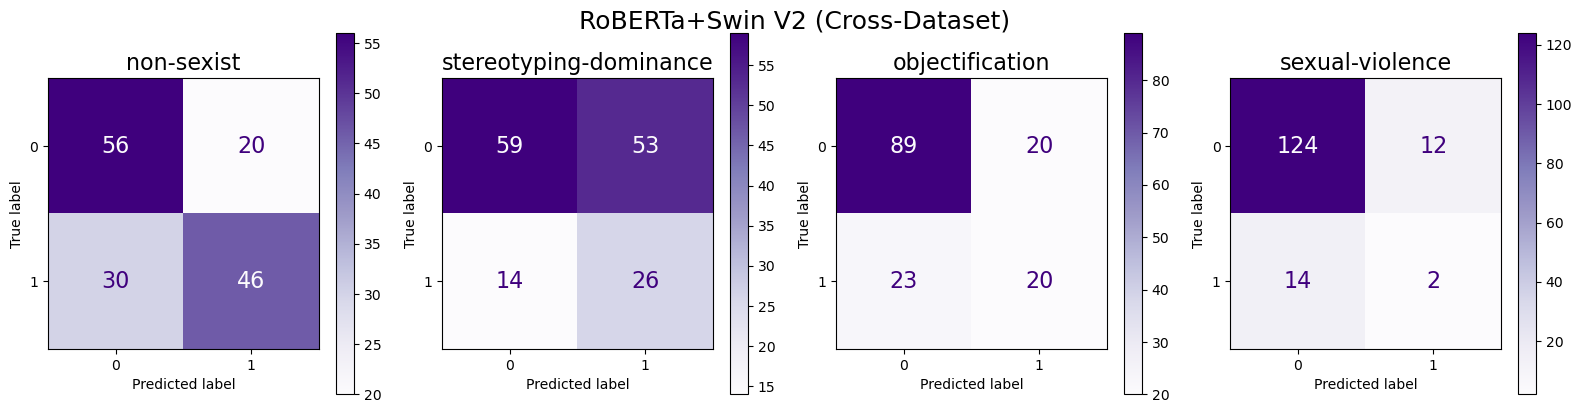

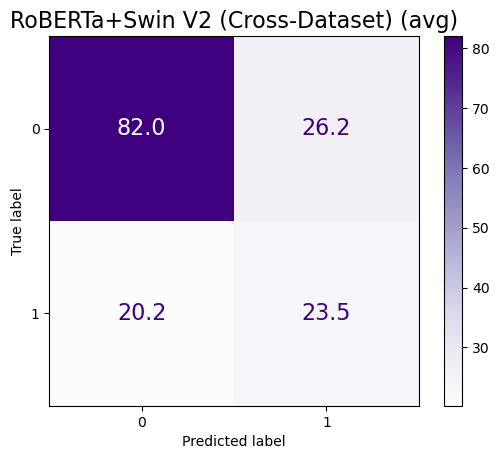

------------------------------
Ensemble - cross-dataset
Class sexist              | FPR: 0.39  | PPV: 0.65
Class stereotyping-dominance| FPR: 0.48  | PPV: 0.34
Class objectification     | FPR: 0.20  | PPV: 0.52
Class sexual-violence     | FPR: 0.08  | PPV: 0.21
Average FPR: 0.29
Average PPV: 0.43
------------------------------


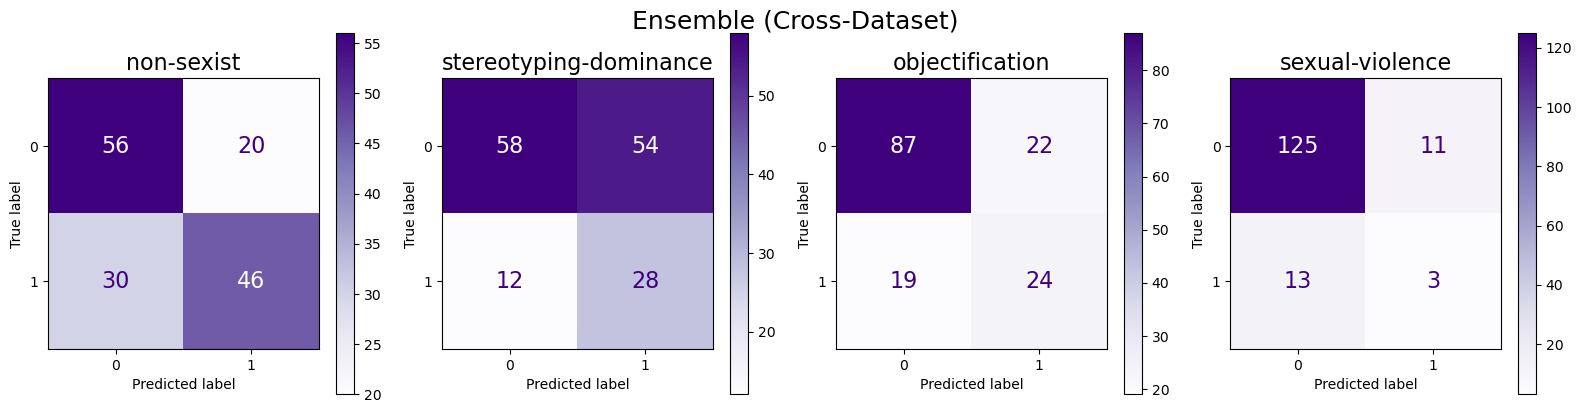

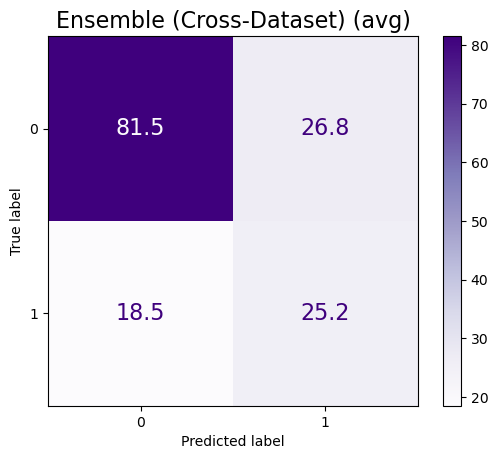

------------------------------


In [26]:
model_names = ["SVM Style-Emo","RoBERTa","RoBERTa+Swin V2","Ensemble"]
predictions = [y_style_emo,y_roberta,y_multimodal,y_ensemble]

for model, prediction_list in zip (model_names,predictions):
    get_fpr_ppv(y_test,prediction_list,model,exist_label_names,setup="cross-dataset")
    print("-"*30)
    get_avg_confusion_matrices(y_test, prediction_list,exist_label_names,model,setup="cross-dataset")
    print("-"*30)